# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()
import seaborn as sns

#Ploting imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# #importing the dataset as a dataframe
df = pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Build the model

Setting x and y


In [11]:
X = df.stroke
y = df.compressionratio



Creating the function for batch gradient descent


In [12]:
def batch_gradient_descent(X,y, learn_rate = 0.05, epoch = 10):
    m, b = 0.2, 0.2 #parameters
    log, mse = [], [] #lists to store learning
    N = len(X) #number of samples
    
    for __ in range(epoch):
        f = y - (m * X + b)
        
        #update m and b
        m -= learn_rate * (-2 * X.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m,b))
        mse.append(mean_squared_error(y, (m * X + b)))
        
    return m, b, log, mse

In [54]:

m, b, log, mse = batch_gradient_descent(X, y, learn_rate = 0.01, epoch = 50)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))


MSE: 15.175905498744525


#Graphing the results


<ipython-input-55-cef9dab5593f>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Batch Gradient Descent Optimization', fontSize=20, color = '#90d')


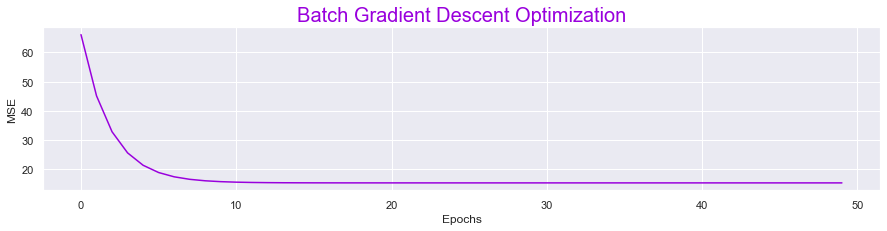

In [55]:
plt.figure(figsize=(15,3))
plt.plot(range(len(mse)), mse, color = '#90d')
plt.title('Batch Gradient Descent Optimization', fontSize=20, color = '#90d')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# Stochastic Gradient Descent

In [56]:

def stochastic_gradient_descent(X, y, learn_rate = 0.05, epoch = 50, batch_size=1):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for __ in range(epoch):
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        #updating parameters m and b
        m -= learn_rate * (-2 * Xs.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

MSE: 15.504798621168257


<ipython-input-58-1819c2d96a86>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Stochastic Gradient Descent Optimization', fontSize=14, color = '#90d')


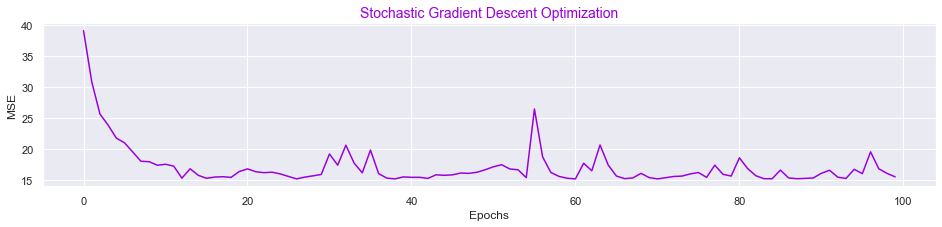

In [58]:
m, b, log, mse = stochastic_gradient_descent(X, y, learn_rate = 0.01, epoch = 100, batch_size=2)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))

#Graphing the results
plt.figure(figsize=(16,3))
plt.plot(range(len(mse)), mse, color = '#90d')
plt.title('Stochastic Gradient Descent Optimization', fontSize=14, color = '#90d')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()